In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split

sys.path.append('../')
from utils import utils

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Load data
boston = load_boston()
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.2, random_state=123)

In [4]:
# RF baseline
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

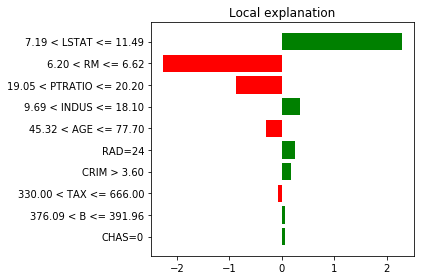

In [5]:
# Get categorical features
categorical_features = [i for i, feature in enumerate(boston.data.T)
                       if np.unique(feature).size <= 10]

explainer = LimeTabularExplainer(
    X_train, mode='regression', feature_names=boston.feature_names,
    categorical_features=categorical_features, class_names=['price'])

exp = explainer.explain_instance(X_test[25], rf.predict)
exp.as_pyplot_figure()
plt.tight_layout()

features that are green helped drive the price up; however, the red features are impacting the price negatively.